In [5]:
!  kaggle competitions download -c data-science-bowl-2018 -p data/

stage1_sample_submission.csv.zip: Downloaded 3KB of 3KB
stage1_train_labels.csv.zip: Downloaded 3MB of 3MB
stage1_test.zip: Downloaded 9MB of 9MB
stage1_train.zip: Downloaded 79MB of 79MB


In [8]:
! rm -r stage1_test/

In [49]:
! pip install torch

    100% |████████████████████████████████| 496.4MB 416bytes/s 0:00:011  2% |▉                               | 13.8MB 15.8MB/s eta 0:00:31    3% |█                               | 15.1MB 11.2MB/s eta 0:00:44    6% |██▏                             | 33.5MB 2.5MB/s eta 0:03:02    7% |██▎                             | 35.2MB 7.0MB/s eta 0:01:06    7% |██▍                             | 36.8MB 2.0MB/s eta 0:03:54    7% |██▌                             | 39.4MB 15.9MB/s eta 0:00:29    8% |██▋                             | 40.2MB 17.1MB/s eta 0:00:27    11% |███▊                            | 57.0MB 3.8MB/s eta 0:01:57    13% |████▎                           | 65.6MB 14.9MB/s eta 0:00:29    13% |████▍                           | 68.4MB 8.3MB/s eta 0:00:52    17% |█████▌                          | 86.1MB 3.0MB/s eta 0:02:19    21% |██████▉                         | 105.3MB 2.6MB/s eta 0:02:32    21% |███████                         | 107.9MB 2.5MB/s eta 0:02:34    22% |███████                  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pd.read_csv('input/stage1_train_labels.csv', nrows=3)

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...


In [1]:
import sys
% load_ext autoreload
% autoreload 2

In [2]:
sys.path.append('../../bowl_2018/')

In [3]:
from my_utils import load_raw_data, read_image, read_mask

CW_DIR = 
TRAIN_DIR = input/stage1_train
TEST_DIR = input/stage1_test


In [4]:
x_train, y_train, x_test, test_df, train_df = load_raw_data(image_size=(256, 256))

Loading and resizing train images and masks ...


  6%|▌         | 4/65 [00:00<00:01, 38.59it/s]

Loading and resizing test images ...


100%|██████████| 65/65 [00:02<00:00, 21.90it/s]


x_train.shape: (670, 256, 256, 3) of dtype uint8
y_train.shape: (670, 256, 256, 1) of dtype uint8
x_test.shape: (65, 256, 256, 3) of dtype uint8


In [11]:
train_df.head()

,img_id,img_height,img_width,img_ratio,num_channels,num_masks,image_path,mask_dir
0,4d2cff9a0c8df3a7ef6100fda6f66e865a7670af6a1856...,520,696,0.747126,3,119,input/stage1_train/4d2cff9a0c8df3a7ef6100fda6f...,input/stage1_train/4d2cff9a0c8df3a7ef6100fda6f...
1,139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5...,256,256,1.000000,3,10,input/stage1_train/139946af9e2c7ef4f0298e622b8...,input/stage1_train/139946af9e2c7ef4f0298e622b8...
2,70827e40a7155391984e56703c6df3392fb4a94bbd6c70...,360,360,1.000000,3,28,input/stage1_train/70827e40a7155391984e56703c6...,input/stage1_train/70827e40a7155391984e56703c6...
3,ec031f176dafe0b36547068ce42eab39428ec7995dac1b...,256,256,1.000000,3,9,input/stage1_train/ec031f176dafe0b36547068ce42...,input/stage1_train/ec031f176dafe0b36547068ce42...
4,66236902b874b7e4b3891db63a69f6d56f6edcec6aca7b...,360,360,1.000000,3,25,input/stage1_train/66236902b874b7e4b3891db63a6...,input/stage1_train/66236902b874b7e4b3891db63a6...


In [12]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(train_df.index, test_size=.2)
print(train.shape, test.shape)

In [24]:
train_df.to_csv('input/train_df.csv', sep=';', index=False)

In [8]:
import cv2

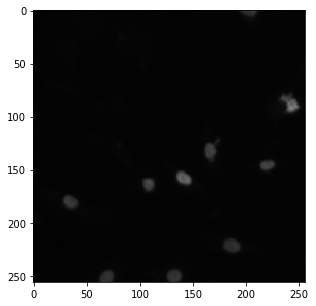

In [11]:
fig, axs = plt.subplots(1,1,figsize=(5,5))
img = read_image(train_df['image_path'].loc[1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2)
axs.imshow(img)

In [12]:
def load_image(path):
    img = cv2.imread(str(path)+str('/img.png'))
    print(img.shape)
    return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

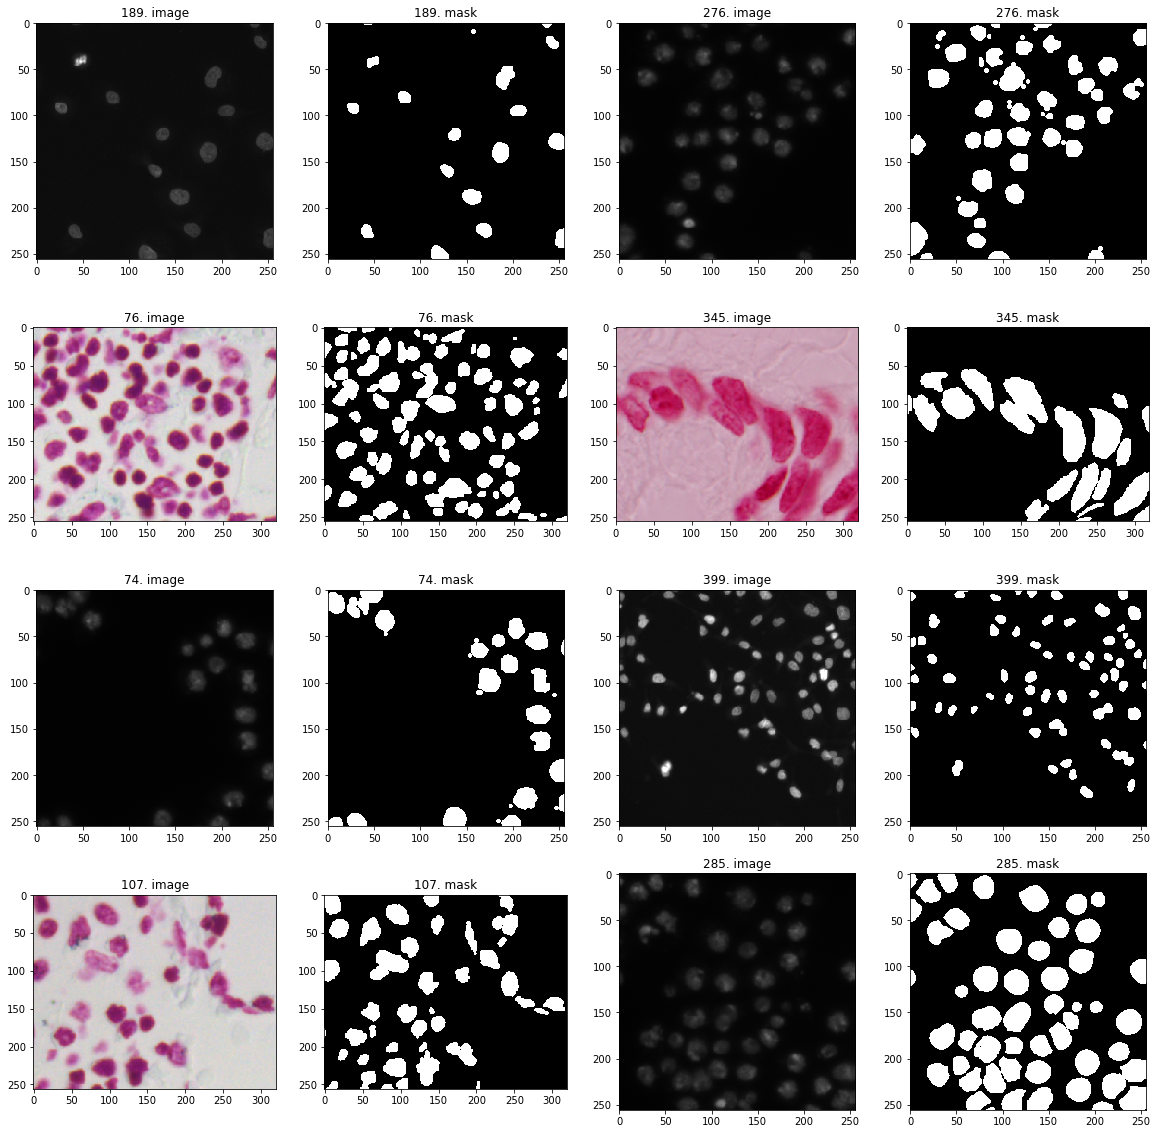

In [48]:
fig, axs = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(2):
        n = np.random.randint(0,len(train_df))
        axs[i,j*2].imshow(read_image(train_df['image_path'].loc[n]))
        axs[i,j*2].set_title('{}. image'.format(n))
        axs[i,j*2+1].imshow(read_mask(train_df['mask_dir'].loc[n]), cmap='gray') 
        axs[i,j*2+1].set_title('{}. mask'.format(n))